## Experiment1

In [444]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
import dash
import dash_html_components as html
import dash_core_components as dcc
import dash.dependencies
from dash.dependencies import Input, Output, State
import dash_daq as daq
import dash_table as dt
import dash_bootstrap_components as dbc
import plotly
import base64
import plotly.graph_objs as go
import networkx as nx
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.tools as tls
import dash_cytoscape as cyto
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from matplotlib_venn import venn3, venn3_circles,venn2,venn2_circles
from matplotlib import pyplot as plt
from surprise import SVD, accuracy,Dataset
from surprise.reader import Reader
from surprise.model_selection import cross_validate,train_test_split
from surprise import SVD,SVDpp,SlopeOne,NMF,NormalPredictor,KNNBaseline,KNNBasic,KNNWithMeans,KNNWithZScore,BaselineOnly,CoClustering

In [445]:
df=pd.read_csv('StudentCourseData_Report (7).csv')

In [446]:
df.to_csv('studdata1.csv',header=False, index=False)

In [447]:
df_t=pd.read_csv('studdata1.csv')

In [448]:
df_t.drop(['Unnamed: 31','Unnamed: 32','Unnamed: 33'],axis=1,inplace=True)

In [449]:
df_tt=df_t.reset_index()

In [450]:
dfrslt=(df_tt.set_index('index')
         .fillna('Semester,Grade,Rating')
         .stack()
         .str.split(',|;', expand=True)
         .stack()
         .str.split(':', expand=True)
         .reset_index(level=2, drop=True)
         .set_index(0, append=True)[1]
         .unstack()
         .rename_axis(('id','sub'))
         .rename_axis(None, axis=1)
         .reset_index()
         )

In [451]:
dfrslt=dfrslt.mask(dfrslt.isna(), np.nan)

In [452]:
dfrslt.rename(columns={'Semester':'semester','Grade':'grade','Rating':'rating'},inplace=True)

In [453]:
dfrslt_nan=dfrslt.dropna(thresh=3, axis=0)

In [478]:
seta=set(list(dfrslt_nan[dfrslt_nan['grade']=='A']['sub'].values)).intersection(set(list(dfrslt_nan[dfrslt_nan['grade']=='B']['sub'].values)))
setf=set(list(dfrslt_nan[dfrslt_nan['grade']=='F']['sub'].values)).intersection(set(list(dfrslt_nan[dfrslt_nan['grade']=='E']['sub'].values)))

In [479]:
setr1=set(list(dfrslt_nan[dfrslt_nan['rating']=='1']['sub'].values)).intersection(set(list(dfrslt_nan[dfrslt_nan['rating']=='2']['sub'].values)))
setr5=set(list(dfrslt_nan[dfrslt_nan['rating']=='5']['sub'].values)).intersection(set(list(dfrslt_nan[dfrslt_nan['rating']=='4']['sub'].values)))

In [480]:
v1=setr1.intersection(seta)
v2=setr5.intersection(setf)
v3=setr1.intersection(setf)
v4=setr5.intersection(seta)

In [481]:
v1,v2,v3,v4

({'Advanced Web Technologies',
  'Electronic Communities and Social Networks',
  'Gestaltung interaktiver Lehr-/Lern-Systeme',
  'Information Mining',
  'Information Retrieval',
  'Interaktive Systeme',
  'Learning Analytics',
  'Recommender Systems'},
 {'Formal Specification of Software Systems', 'Information Mining'},
 {'Information Mining'},
 {'Gestaltung interaktiver Lehr-/Lern-Systeme',
  'Information Mining',
  'Recommender Systems'})

## Good Rating Vs Good Grade

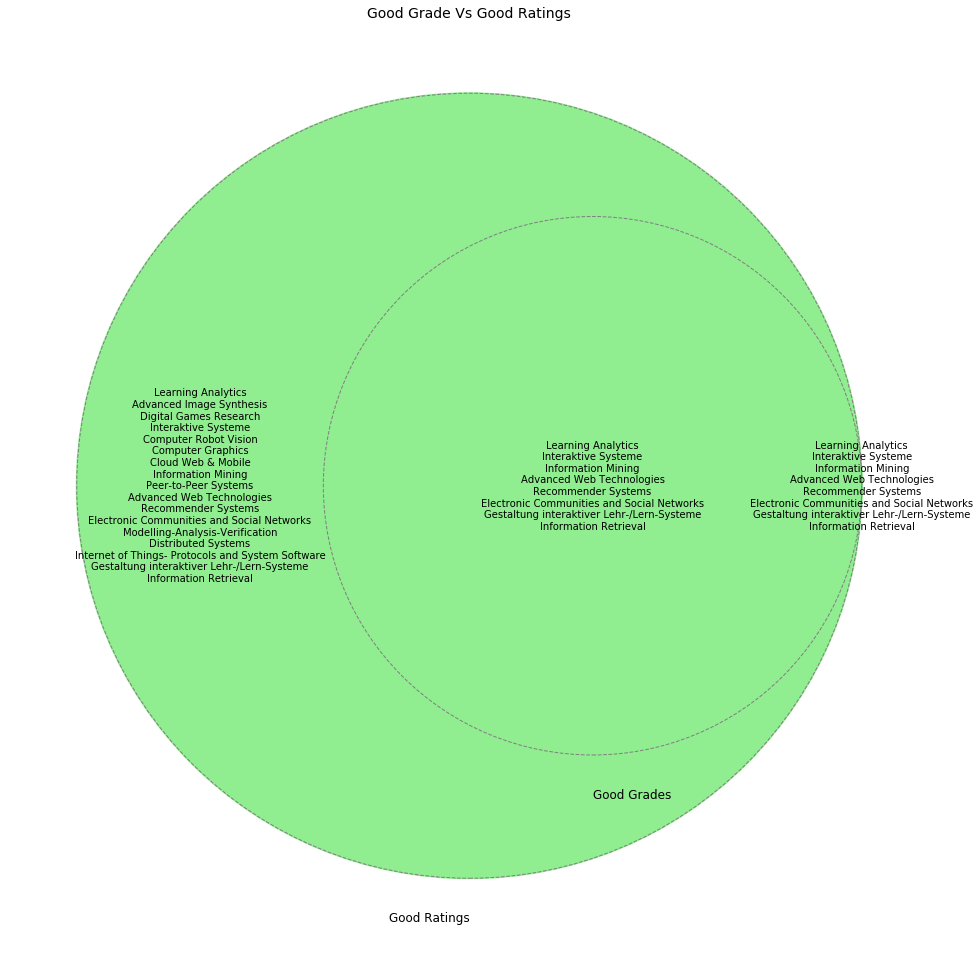

In [482]:
# setup the figure

fig, ax = plt.subplots(figsize = (17,17))
ax.set_title("Good Grade Vs Good Ratings", fontsize=14)
# make the venn diagram
v = venn2([setr1, seta],set_labels=["Good Ratings", "Good Grades"],alpha=1)
# adjust labels from counts to names
v.get_label_by_id('10').set_text('\n'.join(setr1))
v.get_label_by_id('01').set_text('\n'.join(seta))
v.get_label_by_id('11').set_text('\n'.join(v1))
# add circle outlines
c = venn2_circles([setr1, seta],
                  linestyle='solid')
venn2_circles([setr1, seta], linestyle='dashed', linewidth=1, color="grey")
c[0].set_color('lightgreen')
c[1].set_color('lightgreen')


plt.savefig('GGGR.png')

# Bad grades vs Bad Ratings

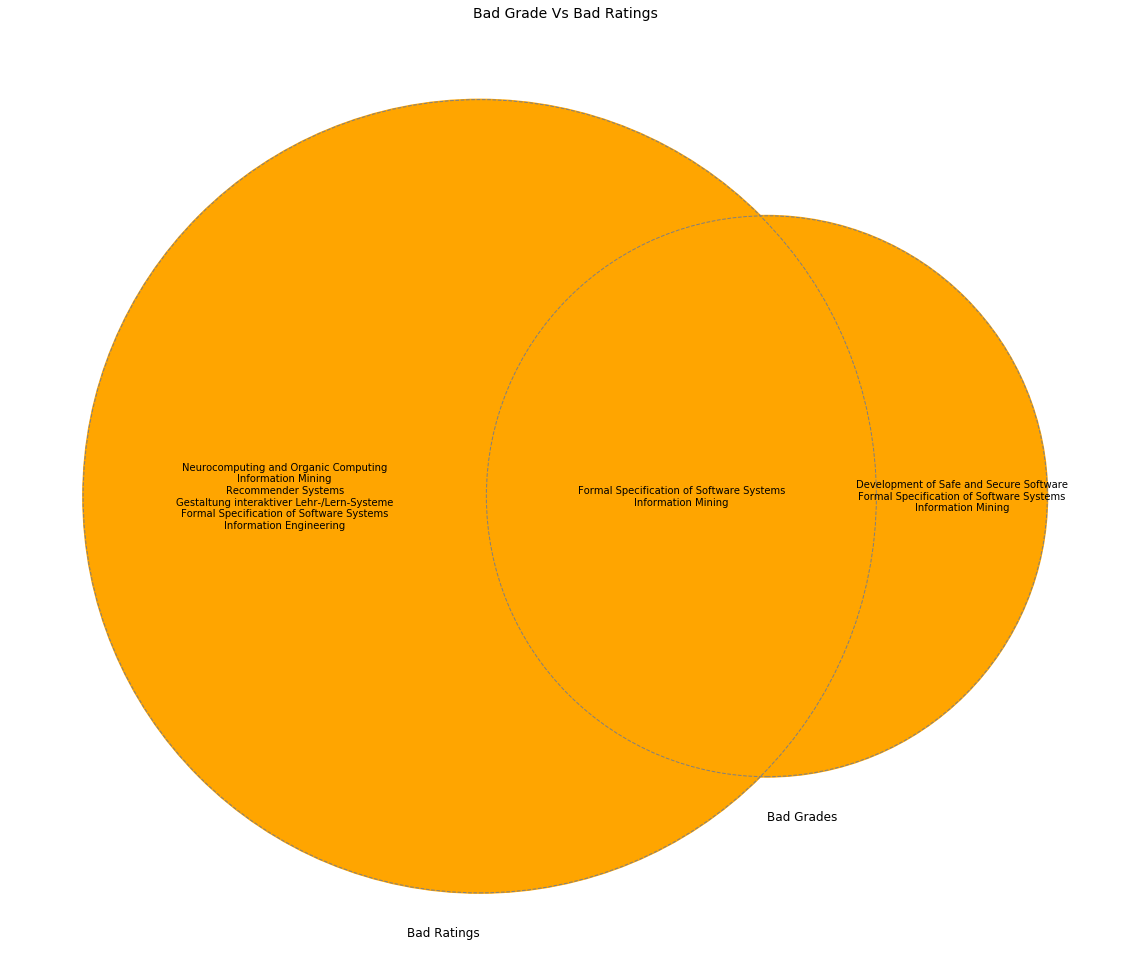

In [483]:
# setup the figure

figa1, axa1 = plt.subplots(figsize = (20,19))
axa1.set_title("Bad Grade Vs Bad Ratings", fontsize=14)
# make the venn diagram
va = venn2([setr5, setf],set_labels=["Bad Ratings", "Bad Grades"])
# adjust labels from counts to names
va.get_label_by_id('10').set_text('\n'.join(setr5))
va.get_label_by_id('01').set_text('\n'.join(setf))
va.get_label_by_id('11').set_text('\n'.join(v2))
# add circle outlines
ca = venn2_circles([setr5, setf],
                  linestyle='solid')
venn2_circles([setr5, setf], linestyle='dashed', linewidth=1, color="grey")

ca[0].set_color('orange')
ca[1].set_color('orange')
# for text in va.set_labels:
#     text.set_fontsize(14)

plt.savefig('BGBR.png')

In [484]:
## Good Grade Vs Bad Ratings

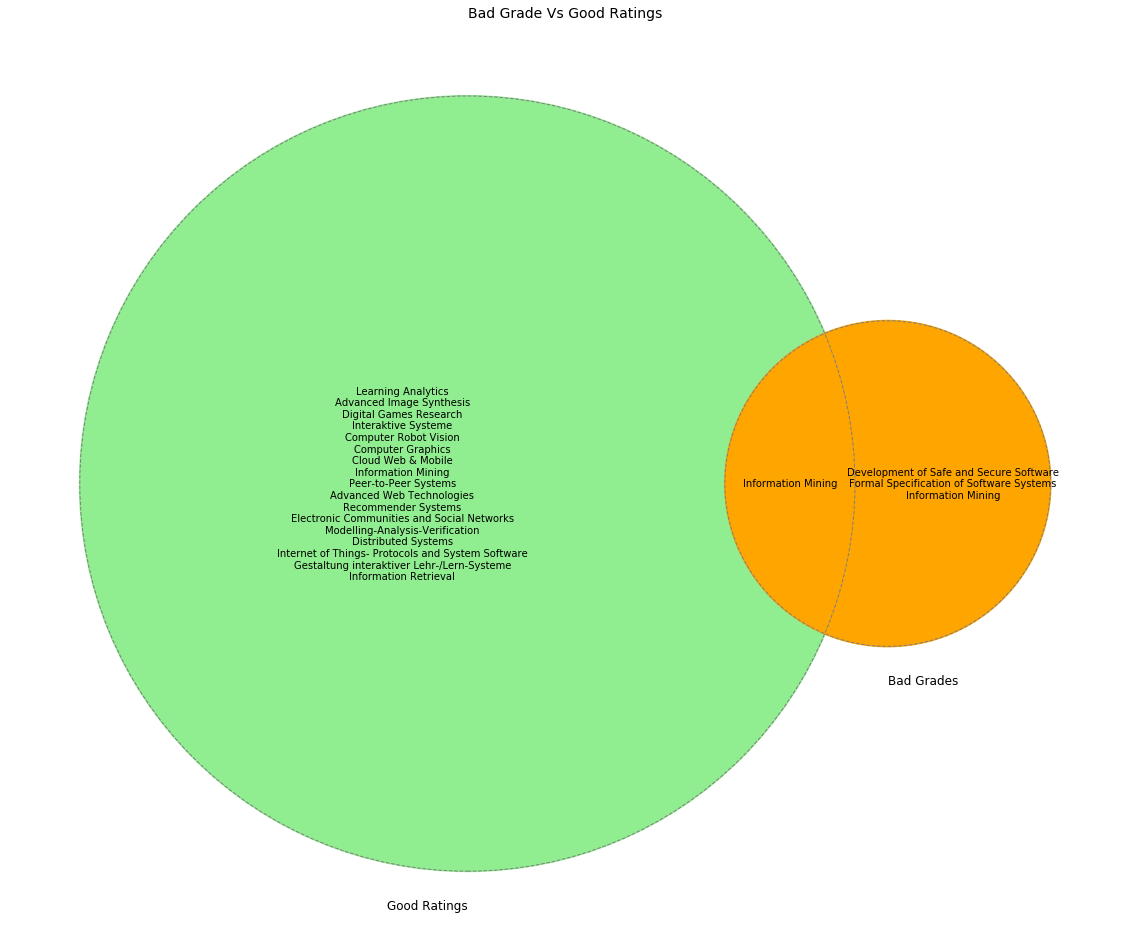

In [485]:
# setup the figure

figa1, axa1 = plt.subplots(figsize = (20,19))
axa1.set_title("Bad Grade Vs Good Ratings", fontsize=14)
# make the venn diagram
vb = venn2([setr1, setf],set_labels=["Good Ratings", "Bad Grades"])
# adjust labels from counts to names
vb.get_label_by_id('10').set_text('\n'.join(setr1))
vb.get_label_by_id('01').set_text('\n'.join(setf))
vb.get_label_by_id('11').set_text('\n'.join(v3))
# add circle outlines
cb = venn2_circles([setr1, setf],
                  linestyle='solid')
venn2_circles([setr1, setf], linestyle='dashed', linewidth=1, color="grey")

cb[0].set_color('lightgreen')
cb[1].set_color('orange')
# for text in va.set_labels:
#     text.set_fontsize(14)

plt.savefig('BGGR.png')

### Bad Ratings Vs Good Grades

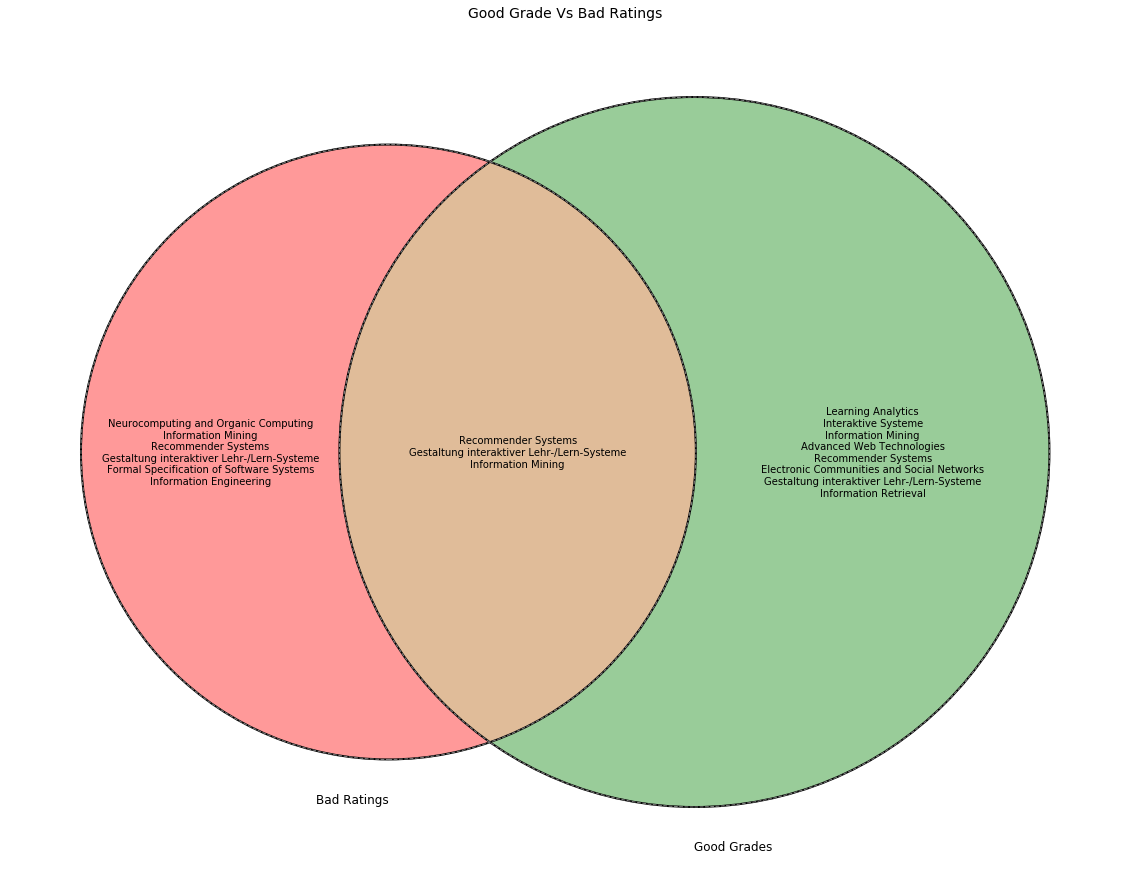

In [489]:
# setup the figure

figa2, axa2 = plt.subplots(figsize = (20,19))
axa2.set_title("Good Grade Vs Bad Ratings", fontsize=14)
# make the venn diagram
vc = venn2([setr5, seta],set_labels=["Bad Ratings", "Good Grades"])
# adjust labels from counts to names
vc.get_label_by_id('10').set_text('\n'.join(setr5))
vc.get_label_by_id('01').set_text('\n'.join(seta))
vc.get_label_by_id('11').set_text('\n'.join(v4))
# add circle outlines
cc = venn2_circles([setr5, seta],
                  linestyle='solid',alpha=1)
venn2_circles([setr5, seta], linestyle='dashed', linewidth=1, color="grey")

cb[0].set_color('orange')
cb[1].set_color('lightgreen')
# for text in va.set_labels:
#     text.set_fontsize(14)

plt.savefig('GGBR.png')

In [490]:
data_sets = {'Good Grade':[list(v1),list(v4)],'Bad Grade':[list(v2),list(v3)]}

In [491]:
df_sets=pd.DataFrame(data_sets, index =['Good Rating', 'Bad Rating']) 

In [492]:
df_sets=df_sets.reset_index()
df_sets.rename(columns = {'index':'Rating'}, inplace = True) 
df_sets

,Rating,Good Grade,Bad Grade
0,Good Rating,"[Learning Analytics, Interaktive Systeme, Info...","[Formal Specification of Software Systems, Inf..."
1,Bad Rating,"[Recommender Systems, Gestaltung interaktiver ...",[Information Mining]


In [493]:
df_subs1=dfrslt_nan.drop(['semester','grade','rating'],axis=1)
df_final=dfrslt_nan.assign(count=dfrslt_nan.groupby(['id','semester']).cumcount()).pivot_table(index = ['id','count'],columns = 'semester',
                        values = 'sub',aggfunc = ''.join).rename_axis(columns = None,index = [None,None])

In [494]:
df_final.to_csv('category1.csv')

In [495]:
df_processed=df_subs1.groupby('id').sub.apply(list).reset_index()

In [496]:
df_processed.set_index('id',inplace=True)

In [497]:
dataset=list(df_processed['sub'].values)

In [498]:
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
df_encoded

,Advanced Image Synthesis,Advanced Web Technologies,Cloud Web & Mobile,Cognitive Robot Systems,Computer Graphics,Computer Robot Vision,Development of Safe and Secure Software,Digital Games Research,Distributed Systems,Electronic Communities and Social Networks,...,Master Seminar Informatics,Modelling of Concurrent Systems,Modelling-Analysis-Verification,Natural-Language-based Human-Computer Interaction,Neurocomputing and Organic Computing,Pattern and Component based Software Development,Peer-to-Peer Systems,Recommender Systems,Scientific Visualization,Test and Reliability of Digital Systems
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,True,False,False,False,False,False,True,True,...,False,False,True,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,True,False,True,True,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,True,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,True,True,True,True,False,False,False,True,...,False,False,True,False,True,True,False,False,False,False
7,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
8,True,True,False,False,False,False,True,False,True,False,...,False,False,False,False,False,False,True,False,False,False
9,False,True,True,True,False,False,True,False,True,True,...,False,False,False,False,False,False,True,False,False,False


In [499]:
from mlxtend.frequent_patterns import apriori

apriori(df_encoded, min_support=0.45,use_colnames=True)

,support,itemsets
0,0.512821,(Distributed Systems)


In [500]:
frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True,verbose=1)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

Processing 13 combinations | Sampling itemset size 13210


,support,itemsets,length
0,0.153846,(Advanced Image Synthesis),1
1,0.435897,(Advanced Web Technologies),1
2,0.307692,(Cloud Web & Mobile),1
3,0.205128,(Cognitive Robot Systems),1
4,0.153846,(Computer Graphics),1
5,0.230769,(Computer Robot Vision),1
6,0.205128,(Development of Safe and Secure Software),1
7,0.076923,(Digital Games Research),1
8,0.512821,(Distributed Systems),1
9,0.410256,(Electronic Communities and Social Networks),1


In [501]:
from mlxtend.frequent_patterns import association_rules

rules=association_rules(frequent_itemsets,metric="confidence",min_threshold=0.1)

In [502]:
l=[]
for i,j in zip(range(0,len(rules.iloc[:,0])),range(0,len(rules.iloc[:,1]))):
    itemset = set(rules.iloc[i,0]) | set(rules.iloc[i,1])
    l.append(tuple(itemset))

In [504]:
len(l)

1924268

In [505]:
import functools
def reduce_concat(x, sep=""):
    return functools.reduce(lambda x, y: str(x) + sep + str(y), x)

def paste(*lists, sep=" ", collapse=None):
    result = map(lambda x: reduce_concat(x, sep=sep), zip(*lists))
    if collapse is not None:
        return reduce_concat(result, sep=collapse)
    return list(result)

In [506]:
antecedents=[]
for i in range(0,len(rules.iloc[:,0])):
    antecedents.append(list(rules.iloc[i,0]))

In [507]:
consequents=[]
for i in range(0,len(rules.iloc[:,1])):
    consequents.append(list(rules.iloc[i,1]))

In [509]:
list_join=paste(antecedents, consequents, sep=',')
df_join=pd.DataFrame(list_join)
halfjoins=df_join[0].str.replace('[','')
ohnequote=halfjoins.str.replace(']','')
finalentry=ohnequote.str.replace("'","")
newrules=rules.assign(itemsets=finalentry)

In [510]:
l1=[]
for val in newrules['itemsets']:
    l1.append((val,))

In [511]:
newrules_up=newrules.assign(itemsets1=l1,inplace=True)
newrules_up.drop(['itemsets'],axis=1,inplace=True)


In [512]:
max_support=newrules_up[newrules_up['confidence']==max(newrules_up['confidence'])]
df_max_support=max_support[['support','confidence','itemsets1']]
df_max_support=df_max_support[df_max_support['support']>=0.15]
df_maxrules1=max_support[['antecedents','consequents','support','confidence']]
df_maxconf=df_maxrules1[df_maxrules1['support']>=0.15]

In [2733]:
mini_support=newrules_up[newrules_up['confidence']==min(newrules_up['confidence'])]
df_min_support=mini_support[['support','confidence','itemsets1']]
df_min_support=df_min_support[df_min_support['support']<=0.051283]

In [513]:
df_maxconf['antecedents']=df_maxconf['antecedents'].astype(str)
df_maxconf['consequents']=df_maxconf['consequents'].astype(str)

In [514]:
df_maxconf['antecedents'].values[0]

"frozenset({'Distributed Systems', 'Development of Safe and Secure Software'})"

In [515]:
df_maxconf['antecedents'] = df_maxconf['antecedents'].apply(lambda x: x.replace('frozenset(',''))
df_maxconf['antecedents'] = df_maxconf['antecedents'].apply(lambda x: x.replace(')',''))
df_maxconf['antecedents'] = df_maxconf['antecedents'].apply(lambda x: x.replace("'",""))

In [516]:
df_maxconf['consequents'] = df_maxconf['consequents'].apply(lambda x: x.replace('frozenset(',''))
df_maxconf['consequents'] = df_maxconf['consequents'].apply(lambda x: x.replace(')',''))
df_maxconf['consequents'] = df_maxconf['consequents'].apply(lambda x: x.replace("'",""))

In [517]:
df_maxconf=df_maxconf[['antecedents','support','consequents']]

In [518]:
categorical_dimensions = ['antecedents', 'consequents']

dimensions = [dict(values=df_maxconf[label], label=label) for label in categorical_dimensions]

# Build figure as FigureWidget
frequent_association_sets = go.FigureWidget(
    data=[go.Parcats(
        domain={'x': [0.4, 0.7],'y':[0,1]}, dimensions=dimensions,
        line={ 'cmin': 0,
              'cmax': 1, 'shape': 'linear'},tickfont=dict(size=10,family='arial'))
    ])
frequent_association_sets.update_layout(width=900,title='Association Rules between Courses')

FigureWidget({
    'data': [{'dimensions': [{'label': 'antecedents',
                              'values': a…

In [519]:
df_rec=dfrslt_nan
s=df_rec['sub'].astype('category')
grade=df_rec['grade'].astype('category')
df_rec=df_rec.fillna(0)
df_rec['rating']=df_rec['rating'].astype(int)
df_rec['course id']=s.cat.codes
df_rec['grade_codes']=grade.cat.codes


## U-I Matrix

In [520]:
df_useritem=df_rec[['id','course id','sub','rating']]

In [521]:
course_matrix = df_useritem.pivot_table(index='id', columns='sub', values='rating')
course_matrix.head()

sub,Advanced Image Synthesis,Advanced Web Technologies,Cloud Web & Mobile,Cognitive Robot Systems,Computer Graphics,Computer Robot Vision,Development of Safe and Secure Software,Digital Games Research,Distributed Systems,Electronic Communities and Social Networks,...,Master Seminar Informatics,Modelling of Concurrent Systems,Modelling-Analysis-Verification,Natural-Language-based Human-Computer Interaction,Neurocomputing and Organic Computing,Pattern and Component based Software Development,Peer-to-Peer Systems,Recommender Systems,Scientific Visualization,Test and Reliability of Digital Systems
id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,2.0,1.0,...,NaN,NaN,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,NaN,2.0,2.0,NaN,2.0,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [522]:
list_useritem=[]
for val in list(course_matrix.values):
    val=list(val)
    list_useritem.append(val)

In [523]:
fig_hmap = go.Figure(data=go.Heatmap(
                   z=list_useritem,
                   x=list(course_matrix.index),
                   y=list(course_matrix.columns),
                   hoverongaps = False))
fig_hmap.update_layout(title='User-Item Ratings Matrix')

## Recommendation System

In [2873]:
df_useritem=df_useritem.replace(np.nan,0)

In [2874]:
df_useritem.shape

(195, 4)

In [2875]:
df_useritem=df_useritem[df_useritem['rating']!=0]

In [2876]:
df_useritem['rating'].unique()

array([5, 4, 2, 1, 3], dtype=int64)

In [2877]:
reader=Reader(rating_scale=(1, 5))

In [2878]:
data = Dataset.load_from_df(df_useritem[['id', 'course id', 'rating']],reader)

In [2879]:
df_subid=df_useritem[['sub','course id']]

In [2880]:
df_subid.drop_duplicates()

,sub,course id
14,Information Engineering,14
15,Information Mining,15
16,Information Retrieval,16
18,Internet of Things- Protocols and System Software,18
63,Advanced Web Technologies,1
64,Cloud Web & Mobile,2
70,Distributed Systems,8
71,Electronic Communities and Social Networks,9
79,Interaktive Systeme,17
82,Learning Analytics,20


In [2881]:
df_subid.sort_values(by=['course id'], inplace=True)
df_subid.drop_duplicates(inplace=True)
df_subid.head(5)

,sub,course id
248,Advanced Image Synthesis,0
900,Advanced Web Technologies,1
405,Cloud Web & Mobile,2
592,Cognitive Robot Systems,3
190,Computer Graphics,4


In [2882]:
trainset, testset = train_test_split(data, test_size=0.2)

In [2883]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    try:
        results = cross_validate(algorithm, data, measures=['RMSE'], cv=2, verbose=True)
    except ZeroDivisionError:
        print('Nan values are eliminated')
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
df_recommendations=pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')

Evaluating RMSE of algorithm SVD on 2 split(s).

                  Fold 1  Fold 2  Mean    Std     
RMSE (testset)    1.0278  1.2469  1.1373  0.1096  
Fit time          0.01    0.01    0.01    0.00    
Test time         0.00    0.00    0.00    0.00    
Evaluating RMSE of algorithm SVDpp on 2 split(s).

                  Fold 1  Fold 2  Mean    Std     
RMSE (testset)    1.1111  1.1080  1.1096  0.0016  
Fit time          0.03    0.03    0.03    0.00    
Test time         0.00    0.00    0.00    0.00    
Evaluating RMSE of algorithm SlopeOne on 2 split(s).

                  Fold 1  Fold 2  Mean    Std     
RMSE (testset)    1.3014  1.2261  1.2637  0.0376  
Fit time          0.00    0.00    0.00    0.00    
Test time         0.00    0.00    0.00    0.00    
Evaluating RMSE of algorithm NMF on 2 split(s).

                  Fold 1  Fold 2  Mean    Std     
RMSE (testset)    1.3576  1.3212  1.3394  0.0182  
Fit time          0.02    0.02    0.02    0.00    
Test time         0.00    0.00  

## Line Plot for RMSE

In [3760]:
fig_line = px.line(df_recommendations.reset_index()[6:10],x="Algorithm", y="test_rmse")
fig_line.update_layout(title='RMSE for Different Collaborative filtering Algorithms')

In [2885]:
sim_options = {
    "name": "msd",
    "user_based": True,
}

In [2886]:

from surprise.model_selection import GridSearchCV
algo = KNNWithMeans(sim_options=sim_options)
#gs.fit(data)

In [2887]:
algo.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [2888]:
predictions=algo.test(testset)

In [2889]:
accuracy.rmse(predictions)

RMSE: 1.1900


1.1900272618180185

In [2890]:
import collections
def get_top_n(predictions, n=10):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = collections.defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [2891]:
top_n = get_top_n(predictions, n=10)

In [2892]:
# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

9 [16]
4 [3, 5, 0]
8 [6, 20, 27, 1]
19 [17, 18, 2]
37 [11, 16]
22 [18]
0 [16]
31 [27, 1]
2 [14, 23, 20, 27, 1]
10 [14]
17 [20]
14 [20, 1]
12 [8]
23 [4]
29 [16, 18]
26 [8, 16]
25 [28, 15]
6 [15]
13 [6, 11]
33 [24, 2]


In [2893]:
list_neighbors=algo.get_neighbors(18,k=3)

In [2894]:
list_neighbors

[0, 7, 12]

In [2895]:
def get_neighbors(list1,k):
    list_neighbors=[]
    list_subs_up=[]
    for val in list1:
        list_subs_up.append(int(df_subid[df_subid['sub']==val]['course id'].values))  
    for val in list_subs_up:
        list_neighbors.append(algo.get_neighbors(val,k))
        print("The students who chose these subjects chose the following subjects:",algo.get_neighbors(val,k))
    return list_neighbors

In [2896]:
def get_subs(list1):
    l_neigh=[]
    for val in list1:
        l_neigh.append(((df_useritem[df_useritem['course id']==val]['sub']).drop_duplicates()).tolist())
        list_neigh = [item for sublist in l_neigh for item in sublist]
    return list_neigh

In [2897]:
def recommend_courses(list_subs):
    recommendation_list=[]
    for val in get_neighbors(list_subs,3):
        recommendation_list.append(get_subs(val))
    return recommendation_list

In [2898]:
print(recommend_courses(['Advanced Web Technologies']),recommend_courses(['Information Mining']))
print(recommend_courses(['Information Engineering']),recommend_courses(['Gestaltung interaktiver Lehr-/Lern-Systeme']))
print(recommend_courses(['Test and Reliability of Digital Systems']))
#print(recommend_courses(['Digital GamesResearch']))
print(recommend_courses(['Electronic Communities and Social Networks']))
print(recommend_courses(['Digital Games Research']))
print(recommend_courses(['Cognitive Robot Systems']))

The students who chose these subjects chose the following subjects: [4, 13, 6]
The students who chose these subjects chose the following subjects: [17, 25, 31]
[['Computer Graphics', 'Gestaltung interaktiver Lehr-/Lern-Systeme', 'Development of Safe and Secure Software']] [['Interaktive Systeme', 'Neurocomputing and Organic Computing']]
The students who chose these subjects chose the following subjects: [0, 11, 19]
The students who chose these subjects chose the following subjects: [27, 11, 12]
[['Advanced Image Synthesis', 'Formal Specification of Software Systems']] [['Peer-to-Peer Systems', 'Formal Specification of Software Systems']]
The students who chose these subjects chose the following subjects: [12, 1, 23]
[['Advanced Web Technologies', 'Modelling-Analysis-Verification']]
The students who chose these subjects chose the following subjects: [21, 24, 32]
[['Natural-Language-based Human-Computer Interaction']]
The students who chose these subjects chose the following subjects: [1

In [2899]:
df_sankey_daig=pd.read_csv('category1.csv')
df_sankey_daig.drop(['Unnamed: 0'],axis=1,inplace=True)

In [2900]:
df_rec_ratings=df_rec[df_rec['rating']!=0]

In [2901]:
df_ratings=df_rec_ratings.groupby('sub').rating.mean().reset_index()
df_ratings.head(4)

,sub,rating
0,Advanced Image Synthesis,1.666667
1,Advanced Web Technologies,1.538462
2,Cloud Web & Mobile,1.888889
3,Cognitive Robot Systems,2.666667


## Plots

In [2902]:
fig3 = px.scatter(newrules_up, x="support", y="confidence", size="lift",hover_name="itemsets1")

In [2903]:
sub_values=df_rec['sub'].value_counts(sort=True).to_frame()
sub_graph_values=sub_values.rename(columns={sub_values.columns[0]: 'frequency'}).reset_index()

In [2904]:
fig_pie = go.Figure(data=[go.Pie(labels=list(sub_graph_values['index'].values), values=list(sub_graph_values['frequency'].values), hole=.3)])
fig_pie.update_layout(title='Distribution of Courses')

In [2905]:
fig5 = go.Figure(data=[go.Histogram(y=df_subs1['sub'].values)])
fig5.show()

In [2906]:
df_rec1=df_rec
df_rec1=df_rec1[df_rec1['grade']!=0]
df_rec1=df_rec1[(df_rec1['rating']!='0') & (df_rec1['rating']!=0)]
df_rec1['rating']=df_rec1['rating'].astype(int)

C:\Users\GOLLAKOTA\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [2907]:
df_rec1['course id']=df_rec1['course id'].astype(str)
df_rec1['id']=df_rec1['id'].astype(str)
df_rec1['grade_codes']=df_rec1['grade_codes'].astype(str)

In [2908]:
#df_rec1[df_rec1['semester']==0]=df_rec1[df_rec1['semester']==0].applymap(str).iloc[0,3]

In [2909]:
df_rec1['rating'].values

array([5, 4, 4, 2, 1, 3, 2, 1, 4, 1, 1, 1, 1, 2, 1, 3, 2, 2, 3, 1, 2, 1,
       2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 1, 3, 2, 3, 3, 1, 4, 3, 3, 4, 3, 2,
       1, 3, 1, 3, 3, 3, 2, 2, 2, 2, 1, 2, 2, 2, 4, 4, 4, 3, 1, 2, 1, 2,
       3, 2, 1, 1, 3, 3, 1, 1, 1, 1, 3, 3, 1, 5, 1, 1, 1, 1, 1, 3, 2, 1,
       3, 3, 1, 2, 4, 2, 2, 5, 2, 3, 2, 5, 3, 1, 2, 1, 5, 5, 3, 2, 4, 1,
       5, 5, 3, 2, 4, 1, 1, 5, 1, 1, 5, 3, 2, 2, 2, 4, 3, 3, 5, 4, 2, 4,
       3, 4, 4, 4, 5, 4, 1, 3, 1, 2, 5, 3, 4, 1, 1, 5, 5, 2, 4, 1, 2, 2,
       4, 1, 1, 5, 5, 3, 2, 1, 1, 2, 1, 2, 1, 3, 1, 3, 3, 2, 2, 3, 2])

In [2910]:
fig6=px.scatter(df_rec1.sort_values(by=['semester']), x='course id', y='grade',size='rating',
                color='sub',animation_frame="semester", animation_group="course id")
#px.scatter(df_rec, x="sub", y="rating", animation_frame="rating", animation_group="course id",size='rating',
            #color="course id", hover_name="sub")
fig6.update_layout(title="Ratings semester wise",width=900)
fig6.show()

In [2911]:
df_sankey_daig.replace(np.nan,'No Course',inplace=True)
df_sankey_small=df_sankey_daig[1:50]
categorical_dimensions = ['1', '2', '3','4','Other']

dimensions = [dict(values=df_sankey_daig[label], label=label) for label in categorical_dimensions]

In [2912]:
color = ['peru','thistle','indianred','violet','salmon','tan','palegoldenrod','orchid','seagreen','navajowhite','mediumseagreen','papayawhip',
        'khaki','grey','honeydew','moccasin']
#colorscale = [[0, 'lightsteelblue'], [1, 'mediumseagreen']];

# Build figure as FigureWidget
fig_p = go.FigureWidget(
    data=[go.Parcats(
        domain={'x': [0.11, 1]}, dimensions=dimensions,
        line={ 'cmin': 0,
              'cmax': 1, 'color': color, 'shape': 'hspline'},tickfont=dict(size=7,family='arial'))
    ])

In [3781]:
fig_p.get_subplot(1,1)

TypeError: object of type 'NoneType' has no len()

In [2913]:
fig_p.update_layout(height=700,width=900,title='Student behavioral flow from Semester to Semester')

FigureWidget({
    'data': [{'dimensions': [{'label': '1',
                              'values': array(['Inf…

## Plot based on grades

In [2914]:
series_ratings=df_rec.groupby('sub').rating.value_counts(sort=True).to_frame()
ratings_graph_data=series_ratings.rename(columns={series_ratings.columns[0]: 'frequency'}).reset_index()

In [2915]:
series_grades=df_rec.groupby('sub').grade.value_counts(sort=True).to_frame()
grade_graph_data1=series_grades.rename(columns={series_grades.columns[0]: 'frequency'}).reset_index()

In [2916]:
grade_graph_data=grade_graph_data1.drop(grade_graph_data1[grade_graph_data1['grade']==0].index)

In [2917]:
grade_graph_data['grade'].unique()

array(['B', 'C', 'F', 'A', 'D', 'E'], dtype=object)

In [2918]:
grade_graph_data[grade_graph_data['sub']=='Cloud Web & Mobile']

,sub,grade,frequency
9,Cloud Web & Mobile,C,7
11,Cloud Web & Mobile,B,1
12,Cloud Web & Mobile,E,1


In [2919]:
grade_A=grade_graph_data[grade_graph_data['grade']=='A']
grade_F=grade_graph_data[grade_graph_data['grade']=='F']

In [2920]:
easy_sub=grade_A[grade_A['frequency']==max(grade_A['frequency'])]['sub'].values[0]
diff_sub=grade_F[grade_F['frequency']==max(grade_F['frequency'])]['sub'].values[0]

In [2921]:
series_semester=df_rec.groupby('sub').semester.value_counts(sort=True).to_frame()
semester_graph_data=series_semester.rename(columns={series_semester.columns[0]: 'frequency'}).reset_index()

In [2922]:
def get_rating_frequency(value):
    return ratings_graph_data[ratings_graph_data['sub']==value]

In [2923]:
def get_grade_frequency(value):
    return grade_graph_data[grade_graph_data['sub']==value]

In [2924]:
list(get_grade_frequency('Information Mining')['grade'].values)

['D', 'A', 'B', 'C', 'E', 'F']

In [2925]:
def get_semester_frequency(value):
    return semester_graph_data[semester_graph_data['sub']==value]

In [3185]:
fig11 = px.bar(df_ratings, x='sub', y='rating',
              color='rating', height=400)
fig11.update_layout(height=600,width=700,font=dict(size=8),title='Mean Rating of all the Courses')
fig11.update_xaxes(title='Course')
fig11.update_yaxes(title='Mean Rating')

### Semester Wise Data

In [2927]:
sem_data=df_rec.groupby('semester').sub.value_counts(sort=True).to_frame()
semester_data=sem_data.rename(columns={sem_data.columns[0]: 'frequency'}).reset_index()

In [2928]:
sem11=list(semester_data[semester_data['semester']=='1']['sub'].values)
sem12=list(semester_data[semester_data['semester']=='1']['frequency'].values)
sem21=list(semester_data[semester_data['semester']=='2']['sub'].values)
sem22=list(semester_data[semester_data['semester']=='2']['frequency'].values)
sem31=list(semester_data[semester_data['semester']=='3']['sub'].values)
sem32=list(semester_data[semester_data['semester']=='3']['frequency'].values)
sem41=list(semester_data[semester_data['semester']=='4']['sub'].values)
sem42=list(semester_data[semester_data['semester']=='4']['frequency'].values)
semo1=list(semester_data[semester_data['semester']=='Other']['sub'].values)
semo2=list(semester_data[semester_data['semester']=='Other']['frequency'].values)

## Grade Wise

In [2929]:
grade_data=df_rec.groupby('grade').sub.value_counts(sort=True).to_frame()
grade_graph_data=grade_data.rename(columns={grade_data.columns[0]: 'frequency'}).reset_index()

In [2930]:
gradea1=list(grade_graph_data[grade_graph_data['grade']=='A']['sub'].values)
gradea2=list(grade_graph_data[grade_graph_data['grade']=='A']['frequency'].values)
gradeb1=list(grade_graph_data[grade_graph_data['grade']=='B']['sub'].values)
gradeb2=list(grade_graph_data[grade_graph_data['grade']=='B']['frequency'].values)
gradec1=list(grade_graph_data[grade_graph_data['grade']=='C']['sub'].values)
gradec2=list(grade_graph_data[grade_graph_data['grade']=='C']['frequency'].values)
graded1=list(grade_graph_data[grade_graph_data['grade']=='D']['sub'].values)
graded2=list(grade_graph_data[grade_graph_data['grade']=='D']['frequency'].values)
gradee1=list(grade_graph_data[grade_graph_data['grade']=='E']['sub'].values)
gradee2=list(grade_graph_data[grade_graph_data['grade']=='E']['frequency'].values)
gradef1=list(grade_graph_data[grade_graph_data['grade']=='F']['sub'].values)
gradef2=list(grade_graph_data[grade_graph_data['grade']=='F']['frequency'].values)

In [2931]:
df_filtered = df_rec[df_rec['semester'] != 'Other' ] 
df_filtered=df_filtered[df_filtered['grade']!=0]
df_filtered=df_filtered[df_filtered['grade']!='F']
df_filtered1 =df_rec[(df_rec['grade'] != 0 ) & (df_rec['grade'] != 'F' )] 

In [2932]:
df_filtered.groupby(['id','semester']).sub.value_counts()

id  semester  sub                                              
0   1         Information Engineering                              1
    2         Information Mining                                   1
              Information Retrieval                                1
              Internet of Things- Protocols and System Software    1
2   1         Distributed Systems                                  1
              Electronic Communities and Social Networks           1
    2         Interaktive Systeme                                  1
              Peer-to-Peer Systems                                 1
    3         Advanced Web Technologies                            1
              Internet of Things- Protocols and System Software    1
              Modelling-Analysis-Verification                      1
    4         Cloud Web & Mobile                                   1
              Information Engineering                              1
              Learning Analytics       

In [2933]:
df_filtered.groupby('id')['sub'].value_counts(sort=True).to_frame()

sub
id sub                                                   
0  Information Engineering                              1
   Information Mining                                   1
   Information Retrieval                                1
   Internet of Things- Protocols and System Software    1
2  Advanced Web Technologies                            1
   Cloud Web & Mobile                                   1
   Distributed Systems                                  1
   Electronic Communities and Social Networks           1
   Information Engineering                              1
   Interaktive Systeme                                  1
   Internet of Things- Protocols and System Software    1
   Learning Analytics                                   1
   Modelling-Analysis-Verification                      1
   Peer-to-Peer Systems                                 1
6  Cloud Web & Mobile                                   1
   Cognitive Robot Systems                              1
   Computer Graphics                                    1
   Computer Robot Vision                                1
   Electronic Communities and Social Networks           1
   Information Mining                                   1
8  Advanced Image Synthesis                             1
   Advanced Web Technologies                            1
   Development of Safe and Secure Software              1
   Distributed Systems                                  1
   Information Retrieval                                1
   Learning Analytics                                   1
   Peer-to-Peer Systems                                 1
9  Advanced Web Technologies                            1
   Cloud Web & Mobile                                   1
   Cognitive Robot Systems                              1
...                                                   ...
32 Internet of Things- Protocols and System Software    1
33 Cloud Web & Mobile                                   1
   Information Mining                                   1
   Natural-Language-based Human-Computer Interaction    1
34 Advanced Web Technologies                            1
   Gestaltung interaktiver Lehr-/Lern-Systeme           1
   Information Retrieval                                1
   Internet of Things- Protocols and System Software    1
35 Advanced Web Technologies                            1
36 Advanced Web Technologies                            1
   Peer-to-Peer Systems                                 1
37 Computer Graphics                                    1
   Distributed Systems                                  1
   Electronic Communities and Social Networks           1
   Formal Specification of Software Systems             1
   Gestaltung interaktiver Lehr-/Lern-Systeme           1
   Information Engineering                              1
   Information Mining                                   1
   Information Retrieval                                1
   Interaktive Systeme                                  1
   Internet of Things- Protocols and System Software    1
   Recommender Systems                                  1
38 Cloud Web & Mobile                                   1
   Distributed Systems                                  1
   Electronic Communities and Social Networks           1
   Information Engineering                              1
   Information Mining                                   1
   Information Retrieval                                1
   Internet of Things- Protocols and System Software    1
   Peer-to-Peer Systems                                 1

[177 rows x 1 columns]

In [2934]:
freq_prosem=df_filtered1.groupby(['id','semester']).sub.value_counts(sort=True).to_frame()

### Frequency of the students for the no of courses

In [2935]:
df_freq_support=df_max_support
df_freq_support.rename(columns = {'itemsets1':'Courses taken together frequently'},inplace=True)

In [2936]:
sub_count=df_filtered.groupby('id').sub.value_counts(sort=True).to_frame()
sub_count_data=sub_count.rename(columns={sub_count.columns[0]: 'frequency'}).reset_index()

In [2937]:
sub_count_data[sub_count_data['id']==30]

,id,sub,frequency
134,30,Advanced Image Synthesis,1
135,30,Advanced Web Technologies,1
136,30,Cloud Web & Mobile,1
137,30,Cognitive Robot Systems,1
138,30,Computer Graphics,1
139,30,Computer Robot Vision,1
140,30,Information Retrieval,1
141,30,Internet of Things- Protocols and System Software,1


In [2938]:
df_stud_complete=sub_count_data.groupby('id').frequency.sum().reset_index()
df_stud_complete[df_stud_complete['frequency']==11]['id'].values

array([ 9, 13, 37], dtype=int64)

## Counting Credits

In [2939]:
count_credits=len(df_stud_complete[df_stud_complete['frequency']>=11])

In [2940]:
fig_bar=px.bar(df_stud_complete,x='frequency',y='id',orientation='h')
fig_bar.show()

In [2941]:
fig_sem = make_subplots(rows=3, cols=2,subplot_titles=("Semester 1", "Semester 2", "Semester 3", "Semester 4","Other Semesters"))

fig_sem.add_trace(go.Bar(x=sem11, y=sem12,name='Semester1'),
              row=1, col=1)

fig_sem.add_trace(go.Bar(x=sem21, y=sem22,name='Semester2'),
              row=1, col=2)
fig_sem.add_trace(go.Bar(x=sem31, y=sem32,name='Semester3'),
              row=2, col=1)
fig_sem.add_trace(go.Bar(x=sem41, y=sem42,name='Semester4'),
              row=2, col=2)
fig_sem.add_trace(go.Bar(x=semo1, y=semo2,name='Other Semester'),
              row=3, col=1)
fig_sem.update_layout(height=2500, width=950,xaxis=dict(tickmode = 'linear'),
                  title_text="Semester Wise Courses Count")#font=dict(size=7))

In [2942]:
fig_grade = make_subplots(rows=3, cols=2,column_widths=[300,500],subplot_titles=("Grade A", "Grade B", "Grade C", "Grade D","Grade E","Grade F"))

fig_grade.add_trace(go.Bar(x=gradea1, y=gradea2,name='Grade A',textfont=dict(size=4,family='Courier')),
              row=1, col=1)

fig_grade.add_trace(go.Bar(x=gradeb1, y=gradeb2,name='Grade B',textfont=dict(size=5,family='Courier')),
              row=1, col=2)
fig_grade.add_trace(go.Bar(x=gradec1, y=gradec2,name='Grade C',textfont=dict(size=5,family='Courier')),
              row=2, col=1)
fig_grade.add_trace(go.Bar(x=graded1, y=graded2,name='Grade D',textfont=dict(size=5,family='Courier')),
              row=2, col=2)
fig_grade.add_trace(go.Bar(x=gradee1, y=gradee2,name='Grade E',textfont=dict(size=5,family='Courier')),
              row=3, col=1)
fig_grade.add_trace(go.Bar(x=gradef1, y=gradef2,name='Grade F',textfont=dict(size=5,family='Courier'),xaxis='x1'),
              row=3, col=2)
fig_grade.update_xaxes(tickangle=90,title='Course')
fig_grade.update_yaxes(title='No. of Students')
fig_grade.update_layout(height=2700, width=900,
                  title_text="Grade Frequency")

In [2943]:
os.getcwd()+'\\sidebar.css'

'C:\\Users\\GOLLAKOTA\\sidebar.css'

In [3913]:
PLOTLY_LOGO = "https://i.ibb.co/S67gj58/Screenshot-2020-01-22-at-22-58-29.png"
PLOTLY_background = "https://www.ibm.com/blogs/business-analytics/wp-content/uploads/2017/09/IBM_Analytics_University_Experience_1280x7201.gif"
#"https://media.giphy.com/media/dWesBc TLavkZuG35MI/giphy.gif"

In [3914]:
app = dash.Dash(
    external_stylesheets=[dbc.themes.BOOTSTRAP,"https://cdnjs.cloudflare.com/ajax/libs/skeleton/2.0.4/skeleton.min.css",
                "https://fonts.googleapis.com/css?family=Raleway:400,400i,700,700i",
                "https://fonts.googleapis.com/css?family=Product+Sans:400,400i,700,700i"],
    meta_tags=[
        {"name": "viewport", "content": "width=device-width, initial-scale=1"}
    ],
)

In [3915]:
colors = {
    'background': '#6f32a8',
    'text': '#f2f542',
    'background-image': 'url("https://www.e-spincorp.com/wp-content/uploads/2019/03/Augmented-analytics-Capabilities-in-Business-Intelligence-1024x688.jpg")'
}

In [3916]:
navbar = dbc.NavbarSimple(
    brand="i-Recommend",
    brand_href="#",
    color="primary",
    dark=True,
)

In [3917]:
sidebar_header = dbc.Row(
    [
        dbc.Col(html.H2("", className="display-5")),
        dbc.Col(
            html.Button(
                html.Span(className="navbar-toggler-icon"),
                className="navbar-toggler",
                style={
                    "color": "rgba(0,0,0,.5)",
                    "border-color": "rgba(0,0,0,.1)",
                },
                id="toggle",
            ),
            width="auto",
            align="center",
        ),
    ]
)

In [3918]:
sidebar = html.Div(
    [
        navbar,
        html.Br(),
        sidebar_header,
        html.Div(
            [
                html.Img(src=PLOTLY_LOGO,style={'height':'70%', 'width':'70%','text-align': 'center'}),   
                html.Hr(),
                
                html.P(
                    " "
                    ,
                    className="lead",
                ),
            ],
            id="blurb",
        ),
        dbc.Collapse(
            dbc.Nav(
                [
                    dbc.NavLink("Home", href="/page-1", id="page-1-link"),
                    dbc.NavLink("Course List", href="/page-2", id="page-2-link"),
                    dbc.NavLink("Statistics", href="/page-3", id="page-3-link"),
                    dbc.NavLink("Course Based Analysis", href="/page-4", id="page-4-link"),
                    dbc.NavLink("Frequent Courses", href="/page-5", id="page-5-link"),
                    dbc.NavLink("Student Paths", href="/page-6", id="page-6-link"),
                    dbc.NavLink("Algorithmic Analysis", href="/page-7", id="page-7-link"),
                    dbc.NavLink("Summary", href="/page-8", id="page-8-link")
                ],
                vertical=True,
                pills=True,
            ),
            id="collapse",
        ),
    ],
    id="sidebar",
)

In [3919]:
content = html.Div(id="page-content",style={'background-image':colors['background-image']})

In [3920]:
app.layout = html.Div([dcc.Location(id="url"),sidebar, content],style={'background-image':colors['background-image']})

In [3921]:
app.config.suppress_callback_exceptions=True

In [3922]:
@app.callback(
    Output("collapse", "is_open"),
    [Input("toggle", "n_clicks")],
    [State("collapse", "is_open")],
)
def toggle_collapse(n, is_open):
    if n:
        return not is_open
    return is_open


In [3923]:
@app.callback(
    [Output(f"page-{i}-link", "active") for i in range(1, 9)],
    [Input("url", "pathname")],
)
def toggle_active_links(pathname):
    if pathname == "/":
        return True, False, False,False,False,False,False,False
    return [pathname == f"/page-{i}" for i in range(1, 9)]

In [3924]:
@app.callback(Output("page-content", "children"), [Input("url", "pathname")])
def render_page_content(pathname):
     
    if pathname in ["/", "/page-1"]:
         return html.Div([html.Img(src=PLOTLY_background,style={'width':'100%','verticalAlign':'middle',
                                                                'align': 'center'}),
                         html.H1("Welcome to i-Recommend: A Course Recommendation System",style={'background-color':'white'})],style={'width':'60%','verticalAlign':'middle',
                                                                'align': 'center','margin-left':'25%','background-image':colors['background-image']})          
    elif pathname == "/page-2":
        return html.Div(children=[dcc.Tabs(id="tabs",children=[
        dcc.Tab(label='Courses', children=[
            html.H2('List Of Courses',style={'textAlign': 'center', 'margin': '48px 0', 'fontFamily': 'georgia','color':'#3269a8'}),
            html.H4('Select the List of Courses you would like to attend:',style={'textAlign': 'left', 'margin': '48px 0', 'fontFamily': 'georgia','color':'#3269b8'}),
            html.Div(dcc.Input(id='input1',value='Enter keyword',type='hidden')),
            html.Div([dcc.Checklist(id='checklist1',
    options=[
        {'label': 'Advanced Image Synthesis', 'value': 'Advanced Image Synthesis'},
        {'label': 'Advanced Web Technologies', 'value': 'Advanced Web Technologies'},
        {'label': 'Cloud Web & Mobile', 'value': 'Cloud Web & Mobile'},
        {'label': 'Cognitive Robot Systems', 'value': 'Cognitive Robot Systems'},
        {'label': 'Computer Robot Vision', 'value': 'Computer Robot Vision'},
        {'label': 'Computer Graphics', 'value': 'Computer Graphics'},
        {'label': 'Gestaltung interaktiver Lehr-/Lern-Systeme', 'value': 'Gestaltung interaktiver Lehr-/Lern-Systeme'},
        {'label': 'Development of Safe and Secure Software', 'value': 'Development of Safe and Secure Software'},
        {'label': 'Digital Games Research', 'value': 'Digital Games Research'},
        {'label': 'Distributed Systems', 'value': 'Distributed Systems'},
        {'label': 'Electronic Communities and Social Networks', 'value': 'Electronic Communities and Social Networks'},
        {'label': 'Fault Diagnosis and Fault Tolerance in Technical Systems', 'value': 'Fault Diagnosis and Fault Tolerance in Technical Systems'},
        {'label': 'Formal Specification of Software Systems', 'value': 'Formal Specification of Software Systems'},
        {'label': 'Game Architecture and Design', 'value': 'Game Architecture and Design'},
        {'label': 'Information Engineering', 'value': 'Information Engineering'},
        {'label': 'Information Mining', 'value': 'Information Mining'},
        {'label': 'Information Retrieval', 'value': 'Information Retrieval'},
        {'label': 'Interaktive Systeme', 'value': 'Interaktive Systeme'},
        {'label': 'Internet of Things- Protocols and System Software', 'value': 'Internet of Things- Protocols and System Software'},
        {'label': 'Knowledge-Based Systems', 'value': 'Knowledge-Based Systems'},
        {'label': 'Learning Analytics', 'value': 'Learning Analytics'},
        {'label': 'Master Seminar Informatics', 'value': 'Master Seminar Informatics'},
        {'label': 'Modelling of Concurrent Systems', 'value': 'Modelling of Concurrent Systems'},
        {'label': 'Modelling-Analysis-Verification', 'value': 'Modelling-Analysis-Verification'},
        {'label': 'Natural-Language-based Human-Computer Interaction', 'value': 'Natural-Language-based Human-Computer Interaction'},
        {'label': 'Neurocomputing and Organic Computing', 'value': 'Neurocomputing and Organic Computing'},
        {'label': 'Pattern and Component based Software Development', 'value': 'Pattern and Component based Software Development'},
        {'label': 'Peer-to-Peer Systems', 'value': 'Peer-to-Peer Systems'},
        {'label': 'Recommender Systems', 'value': 'Recommender Systems'},
        {'label': 'Scientific Visualization', 'value': 'Scientific Visualization'},
        {'label': 'Test and Reliability of Digital Systems', 'value': 'Test and Reliability of Digital Systems'},
        
    ],
                                    #value=[]
  )
                     ],style={'margin-left':'10%'}),
            html.Button('Suggest ME!', id='button1',style={'color':'#4287f5','margin-left':'15%','margin-top':'5%','margin-bottom':'10%','align':'center'}),
            
          #dt.DataTable(id='Table',columns=['Course','Suggested Courses'])
        ]),
        dcc.Tab(label='Generated Recommendations', children=[
            html.Div([
                html.H1("Generated Recommendations"),
                html.Cite("The table below shows the top 3 recommendations based on the choices made by you.Some courses doesnt show any recommendations due to the low rate of choices made by the students for the respective courses"),
                dcc.Store(id="value", storage_type="memory"),
                dcc.Graph(id='table1')
            ])
        ],)])],style={'background-color':'white','width':'80%','margin-left':'15%','margin-right':'0%'})
            
            
          #dt.DataTable(id='Table',columns=['Course','Suggested Courses'])
            
    elif pathname == "/page-3":
        return html.Div([
                html.H1("Statistics based on different Aspects",style={'margin-left':'5%'}),
                html.Br(),
                html.Cite("These graphs show the statistics of the students based on Rating, Grade and Semester",style={'margin-left':'2%'}),
                html.Br(),
                html.Br(),
                dcc.Dropdown(id='dropdown_courses',
                options=[
                     {'label': 'Rating', 'value': 'Rating'},
        {'label': 'Grade', 'value': 'Grade'},
        {'label': 'Semester', 'value': 'Semester'},
                ],value='Rating',style={'margin-left':'1%','margin-right':'1%'}),
                html.Div(id='barchart',)
                
                #html.Div(className='card',children=[html.Img(src='unilogo.png',style={"width:100%"}),
                                                    #html.Div(children=[html.H4("Img1"),html.P("This is image1")])])
            ],style={'background-color':'white','height':'2000','width':'85%','margin-left':'10%','margin-right':'10%','margin-bottom':'0%'})
    
    elif pathname == "/page-4":
        return html.Div([
                html.H1("Course wise graphs"),
                 dcc.Dropdown(
        id='dropdown_courses1',
        options=[
         {'label': 'Advanced Image Synthesis', 'value': 'Advanced Image Synthesis'},
         {'label': 'Advanced Web Technologies', 'value': 'Advanced Web Technologies'},
         {'label': 'Cloud Web & Mobile', 'value': 'Cloud Web & Mobile'},
         {'label': 'Cognitive Robot Systems', 'value': 'Cognitive Robot Systems'},
         {'label': 'Computer Robot Vision', 'value': 'Computer Robot Vision'},
         {'label': 'Computer Graphics', 'value': 'Computer Graphics'},
         {'label': 'Gestaltung interaktiver Lehr-/Lern-Systeme', 'value': 'Gestaltung interaktiver Lehr-/Lern-Systeme'},
         {'label': 'Development of Safe and Secure Software', 'value': 'Development of Safe and Secure Software'},
         {'label': 'Digital Games Research', 'value': 'Digital Games Research'},
         {'label': 'Distributed Systems', 'value': 'Distributed Systems'},
         {'label': 'Electronic Communities and Social Networks', 'value': 'Electronic Communities and Social Networks'},
         {'label': 'Fault Diagnosis and Fault Tolerance in Technical Systems', 'value': 'Fault Diagnosis and Fault Tolerance in Technical Systems'},
         {'label': 'Formal Specification of Software Systems', 'value': 'Formal Specification of Software Systems'},
         {'label': 'Game Architecture and Design', 'value': 'Game Architecture and Design'},
         {'label': 'Information Engineering', 'value': 'Information Engineering'},
         {'label': 'Information Mining', 'value': 'Information Mining'},
         {'label': 'Information Retrieval', 'value': 'Information Retrieval'},
         {'label': 'Interaktive Systeme', 'value': 'Interaktive Systeme'},
         {'label': 'Internet of Things- Protocols and System Software', 'value': 'Internet of Things- Protocols and System Software'},
         {'label': 'Knowledge-Based Systems', 'value': 'Knowledge-Based Systems'},
         {'label': 'Learning Analytics', 'value': 'Learning Analytics'},
         {'label': 'Master Seminar Informatics', 'value': 'Master Seminar Informatics'},
         {'label': 'Modelling of Concurrent Systems', 'value': 'Modelling of Concurrent Systems'},
         {'label': 'Modelling-Analysis-Verification', 'value': 'Modelling-Analysis-Verification'},
         {'label': 'Natural-Language-based Human-Computer Interaction', 'value': 'Natural-Language-based Human-Computer Interaction'},
         {'label': 'Neurocomputing and Organic Computing', 'value': 'Neurocomputing and Organic Computing'},
         {'label': 'Pattern and Component based Software Development', 'value': 'Pattern and Component based Software Development'},
         {'label': 'Peer-to-Peer Systems', 'value': 'Peer-to-Peer Systems'},
         {'label': 'Recommender Systems', 'value': 'Recommender Systems'},
         {'label': 'Scientific Visualization', 'value': 'Scientific Visualization'},
         {'label': 'Test and Reliability of Digital Systems', 'value': 'Test and Reliability of Digital Systems'}
        ],style={'margin-left':'5%','width':'90%','margin-right':'10%'},
        value='Advanced Image Synthesis'
    ),
                html.Div(id='fig_subplot')
                #dcc.Store(id="value", storage_type="memory"),
            ],style={'background-color':'white','margin-left':'15%','margin-right':'2','width':'1000'})
    elif pathname == "/page-5":
        return html.Div([
                html.H1("Frequently registered courses by Students"),
                #dcc.Store(id="value", storage_type="memory"),
                #html.Div(dcc.Graph(id='table_supconfi',figure=table_freqsets))
                dt.DataTable(style_table={'maxWidth':'900px','maxHeight':'2000px','margin-left':'5%'}
                             ,style_cell_conditional=[
        {'if': {'column_id': 'Courses taken together frequently'},
         'width': '60px'},
        {'if': {'column_id': 'support'},
         'width': '5px'},
        {'if': {'column_id': 'confidence'},
         'width': '5px'}
    ],style_data={
        'whiteSpace': 'normal',
        'height': 'auto'
    },
                             style_header={'backgroundColor':'purple','color':'white'},
                             style_cell={'font-family': 'Arial'},
                             editable=False,
        sort_action="native",
    id='table_supconfi',
    columns=[{"name": i, "id": i} for i in df_freq_support.columns],
    data=df_freq_support.to_dict('records'))
            ],style={'margin-left':'10%','margin-right':'5%','background-color':'white'})
    elif pathname == "/page-6":
        return html.Div([dcc.Graph(id='sankey',figure=fig_p)],style={'margin-left':'10%','margin-right':'10%','width':'800px'})
    elif pathname == "/page-7":
        return html.Div([
                html.H1("Visualization based on Algorithms"),
                #dcc.Store(id="value", storage_type="memory"),
                #html.Div(dcc.Graph(id='sup_conf',figure=fig3)),
                html.Div(dcc.Graph(id='fig_line',figure=fig_line)),
                html.Div(dcc.Graph(id='fig_assoc',figure=frequent_association_sets)),
                html.Div(dcc.Graph(id='hmap',figure=fig_hmap))
            ],style={'margin-left':'20%','margin-left':'20%','background-color':'white'})
    elif pathname == "/page-8":
        return html.Div([html.Div(dcc.Graph(id='scatter',figure=fig6)),
                html.Div(dcc.Graph(id='histo',figure=fig_pie)),#fig5
                #html.Div(dcc.Graph(id='tot_bar',figure=fig_bar)),#fig_bar
                #html.Cite('Based on the observations we can say that '+str(count_credits)+' students have completed the required 11 credits in 4 semesters'),
],style={'margin-left':'20%','margin-left':'20%'})

In [3925]:

@app.callback(Output("table1", "figure"), [Input("button1", "n_clicks")],[State("checklist1", "value")])
def update_output(rows,value):
    list_updated=[]
    if rows is not None:
       # Here, I could get DataFrames
        for val in value:
            if val not in list(df_useritem['sub'].values):
                print('No recommendations') 
            else:
                list_updated.append(val)
        l2=recommend_courses(list_updated)
        
        #print(set(l3))
        
        df1 = pd.DataFrame({'Courses' : list_updated,
                                'Recommended_Courses' : l2 }, 
                                columns=['Courses','Recommended_Courses'])
        print(df1.head(5))
    
      # But, have no ideas how to return dash_table.Databales instead ob go.Table
        
        #table = ff.create_table(df1,height_constant=30)
        #table.layout.width=250
        figup=go.Figure(data=[go.Table(columnwidth = [700,3000],
        header=dict(values=list(df1.columns),
                fill_color='purple',
                align='left',
                height=40,
               font=dict(color='white', size=18,family='sans-serif')),
    cells=dict(values=[df1.Courses, df1.Recommended_Courses],
               fill_color='lavender',
               height=80,
               align='left',font=dict(size=11,family='sans-serif')
    ))
])
        figup.update_layout(height=1500,width=900)
        return figup
        


In [3926]:
@app.callback(Output('barchart', 'children'),
              [Input('dropdown_courses', 'value')])
def update_figure(value):
    if value is None:
        return html.Label('No value has been selected.Please select a value')
    elif value=='Rating':
        return html.Div([
            html.Br(),
            html.Cite('This shows the mean rating of each of the courses based on the choices made by students'),
            dcc.Loading(children=[
                dcc.Graph(
                    id='bar chart',
                    figure=fig11
                ),]),
            html.Br(),
            dcc.Slider(
    min=1,
    max=5,
    step=None,
    disabled=True,
    tooltip=dict(always_visible=True,placement='top'),
    marks={
        1: 'Very Good',
        2: 'Good',
        3: 'Satisfactory',
        4: 'Bad',
        5: 'Very Bad'
    },
    value=5,
    
)  
        ],style={'margin-right':'0.5%','margin-left':'0.5%'})
    elif value=='Grade':
        return html.Div([
                html.Br(),
                html.Br(),
                html.Cite('This visualization categorises the courses based on the grades.This would help you to understand in which courses are majority of the students attaining good grades and the other courses under which the students are finding it difficult to get good grades'),
                html.Br(),
                html.Br(),
                dcc.Graph(
                    id='bar chart',
                    figure=fig_grade,
                ),
                html.Br(),
                html.Br(),
            html.Cite('Based on the observations we conclude that lot of students get good grade in '+easy_sub+
                          ' and majority of the students find it difficult to get good grades in '+diff_sub)
        ])
    elif value=='Semester':
        return html.Div([
                html.Cite('This graph shows the interests of students based on semester.It would help you understand what courses are majority of students taking based on the Semester'),
                dcc.Graph(
                    id='bar chart',
                    figure=fig_sem,
                ),
        ])
    
        

In [3927]:
help(make_subplots)

Help on function make_subplots in module plotly.subplots:

make_subplots(rows=1, cols=1, shared_xaxes=False, shared_yaxes=False, start_cell='top-left', print_grid=False, horizontal_spacing=None, vertical_spacing=None, subplot_titles=None, column_widths=None, row_heights=None, specs=None, insets=None, column_titles=None, row_titles=None, x_title=None, y_title=None, **kwargs)
    Return an instance of plotly.graph_objs.Figure with predefined subplots
    configured in 'layout'.
    
    Parameters
    ----------
    rows: int (default 1)
        Number of rows in the subplot grid. Must be greater than zero.
    
    cols: int (default 1)
        Number of columns in the subplot grid. Must be greater than zero.
    
    shared_xaxes: boolean or str (default False)
        Assign shared (linked) x-axes for 2D cartesian subplots
    
          - True or 'columns': Share axes among subplots in the same column
          - 'rows': Share axes among subplots in the same row
          - 'all': Sh

In [3928]:
@app.callback(Output('fig_subplot', 'children'),
              [Input('dropdown_courses1', 'value')])
def update_figure(value):
    if value is None:
        return html.Label('No value has been selected.Please select a value')
    else:
        
        grade=list(get_grade_frequency(value)['grade'].values)
        print(grade)
        grade_freq=list(get_grade_frequency(value)['frequency'].values)
        print(grade_freq)
        grade=grade[1:len(grade)]
        print(grade)
        grade_freq=grade_freq[1:len(grade_freq)]
        print(grade_freq)
        fig_subplots=make_subplots(rows=2, cols=2,subplot_titles=("Rating", "Grades", "Semester"),horizontal_spacing=0.5,column_widths=[500,700])
        fig_subplots.add_trace(go.Bar(x=list(get_rating_frequency(value)['rating'].values),y=list(get_rating_frequency(value)['frequency'].values),name='Rating'),row=1,col=1)
        fig_subplots.add_trace(go.Bar(x=grade,y=grade_freq,name='Grades'),row=1,col=2)
        fig_subplots.add_trace(go.Bar(x=list(get_semester_frequency(value)['semester'].values),y=list(get_semester_frequency(value)['frequency'].values),name='Semester'),row=2,col=1)
        fig_subplots.update_layout(height=600,width=700)
        fig_subplots.update_xaxes(title='Rating',row=1,col=1)
        fig_subplots.update_yaxes(title='No. of Students',row=1,col=1)
        fig_subplots.update_xaxes(title='Grades',row=1,col=2)
        fig_subplots.update_yaxes(title='No. of Students',row=1,col=2)
        fig_subplots.update_xaxes(title='Semester',row=2,col=1)
        fig_subplots.update_yaxes(title='No. of Students',row=2,col=1)
        print(value)

        return html.Div([
            dcc.Graph(
            id='fig subplot',
            figure=fig_subplots)],style={'margin-left':'10%','width':'90%','margin-right':'10%'})

In [ ]:
if __name__ == '__main__':
    app.run_server(debug=False)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
[0, 'B', 'C', 'F']
[3, 1, 1, 1]
['B', 'C', 'F']
[1, 1, 1]
Advanced Image Synthesis
[0, 'C', 'D', 'F']
[3, 3, 1, 1]
['C', 'D', 'F']
[3, 1, 1]
Cognitive Robot Systems
[0, 'C', 'F']
[3, 3, 3]
['C', 'F']
[3, 3]
Computer Robot Vision
[0, 'B', 'C', 'E']
[3, 1, 7, 1]
['B', 'C', 'E']
[1, 7, 1]
Cloud Web & Mobile
[0, 'B', 'C', 'F']
[3, 1, 1, 1]
['B', 'C', 'F']
[1, 1, 1]
Advanced Image Synthesis
[0, 'B', 'C', 'F']
[3, 1, 1, 1]
['B', 'C', 'F']
[1, 1, 1]
Advanced Image Synthesis
